In [1]:
%matplotlib inline

from os import walk
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Clustering 

    Le but : essayer de déterminer pour chaque vol des clusters différents, à comparer avec la notion de phase 0 ou 1 déterminée pour chaque vol. 
    
    La technique de clustering est appliquée pour chaque vol, sans tenir compte de la phase.

In [2]:
path = '/Users/mayliscotadze/Documents/Safran/'

In [3]:
df = pd.read_csv(path + 'all_datas_cleaned.csv', sep=",", header=0, encoding="latin 1")
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

### K = 2, 3  ou 4 clusters

In [4]:
input = ["static pressure", "air speed",
          "rotation speed", "outside temp", "n2", "n1", "torque",
          "turbine temp", "oil pressure", "oil temp", "ground speed", "altitude"]

In [5]:
df1 = df.set_index('n_vol')

In [6]:
df1.head()

,time,phase,static pressure,air speed,rotation speed,outside temp,n2,n1,torque,turbine temp,oil pressure,oil temp,fuel vol,fuel flow,power,ground speed,altitude
n_vol,,,,,,,,,,,,,,,,,
0001-3.csv,18:29:44.000000,0,1012.1,0,0,29,0,0.0,2.3,155,0.0,48,273.0,58.2,21.7,0.0,56.0
0001-3.csv,18:29:46.000000,0,1012.0,0,0,29,0,0.3,2.3,156,0.0,48,273.0,46.6,NaN,0.0,55.0
0001-3.csv,18:29:48.000000,0,1012.1,0,0,29,0,5.3,2.3,157,0.0,48,273.0,33.1,NaN,0.0,54.0
0001-3.csv,18:29:50.000000,0,1012.1,0,0,29,0,10.3,2.3,215,0.0,49,273.0,23.6,NaN,0.0,53.0
0001-3.csv,18:29:52.000000,0,1012.1,0,0,29,0,14.5,2.3,395,0.0,49,273.0,20.9,NaN,0.0,53.0


In [7]:
# Kmeans ne supporte pas les NAN or infinite values
df1.isnull().sum()

time                     0
phase                    0
static pressure          0
air speed                0
rotation speed           0
outside temp             0
n2                       0
n1                       0
torque                   0
turbine temp             0
oil pressure             0
oil temp                 0
fuel vol                 0
fuel flow                0
power              3670242
ground speed            43
altitude                43
dtype: int64

In [8]:
df1 = df1.drop('power', axis = 1)

In [9]:
df1 = df1.dropna()

In [10]:
df1.isnull().sum()

time               0
phase              0
static pressure    0
air speed          0
rotation speed     0
outside temp       0
n2                 0
n1                 0
torque             0
turbine temp       0
oil pressure       0
oil temp           0
fuel vol           0
fuel flow          0
ground speed       0
altitude           0
dtype: int64

In [162]:
# Kmeans needs float type
df_input = df1[input].apply(lambda x : x.astype(float))

In [163]:
df_clusters = pd.DataFrame(index = df1.index, columns = ["clust_2", "clust_3", "clust_4"])

for flight in set(df1.index):

        cluster_labels2 = KMeans(n_clusters = 2).fit_predict(df_input.ix[flight]).tolist()
        df_clusters.ix[flight, "clust_2"] = cluster_labels2
        
        cluster_labels3 = KMeans(n_clusters = 3).fit_predict(df_input.ix[flight]).tolist()
        df_clusters.ix[flight, "clust_3"] = cluster_labels3
        
        cluster_labels4 = KMeans(n_clusters = 4).fit_predict(df_input.ix[flight]).tolist()
        df_clusters.ix[flight, "clust_4"] = cluster_labels4

In [167]:
# On rajoute la colonne phase de notre fichier
df_clusters["phase"] = df1.phase

In [171]:
df_clusters.head()

,clust_2,clust_3,clust_4,phase
n_vol,,,,
0001-3.csv,1,1,3,0
0001-3.csv,1,1,3,0
0001-3.csv,1,1,3,0
0001-3.csv,1,1,3,0
0001-3.csv,1,1,3,0


In [175]:
df_clusters.reset_index().to_csv('df_clusters.csv', sep=',')

### Comparaison marqueur "Phase" et "clust2"

In [11]:
df_clusters = pd.read_csv(path + 'df_clusters.csv', sep=",", header=0, encoding="latin 1")

In [12]:
df_clusters = df_clusters.drop('Unnamed: 0', axis = 1).set_index('n_vol')

In [13]:
df_clusters["time"] = df1.time

In [14]:
df_clusters.head()

,clust_2,clust_3,clust_4,phase,time
n_vol,,,,,
0001-3.csv,1,1,3,0,18:29:44.000000
0001-3.csv,1,1,3,0,18:29:46.000000
0001-3.csv,1,1,3,0,18:29:48.000000
0001-3.csv,1,1,3,0,18:29:50.000000
0001-3.csv,1,1,3,0,18:29:52.000000


In [15]:
# Intervertissons les valeurs 1 et 0 de clust_2 pour être cohérent avec la notation de phase

In [16]:
df_clusters.clust_2 = np.where(df_clusters.clust_2 == 1, 0, 1)

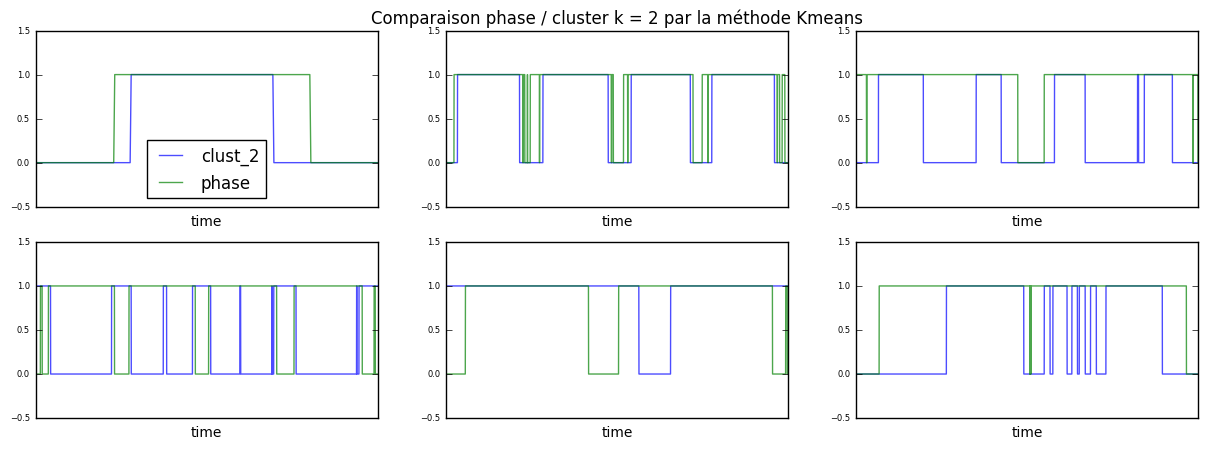

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
axes[0][1].set_title("Comparaison phase / cluster k = 2 par la méthode Kmeans")
df_clusters.ix['0001-3.csv'].plot(x = 'time', y = ['clust_2', 'phase'], ylim=[-0.5, 1.5], xticks = [], ax = axes[0,0], alpha = 0.7, fontsize = 6)
df_clusters.ix['0119-4.csv'].plot(x = 'time', y = ['clust_2', 'phase'], ylim=[-0.5, 1.5], xticks = [], ax = axes[0,1], alpha = 0.7, fontsize = 6, legend = False)
df_clusters.ix['0133-6.csv'].plot(x = 'time', y = ['clust_2', 'phase'], ylim=[-0.5, 1.5], xticks = [], ax = axes[0,2], alpha = 0.7, fontsize = 6, legend = False)
df_clusters.ix['0250-1.csv'].plot(x = 'time', y = ['clust_2', 'phase'], ylim=[-0.5, 1.5], xticks = [], ax = axes[1,0], alpha = 0.7, fontsize = 6, legend = False)
df_clusters.ix['0386-3.csv'].plot(x = 'time', y = ['clust_2', 'phase'], ylim=[-0.5, 1.5], xticks = [], ax = axes[1,1], alpha = 0.7, fontsize = 6, legend = False)
df_clusters.ix['0406-5.csv'].plot(x = 'time', y = ['clust_2', 'phase'], ylim=[-0.5, 1.5], xticks = [], ax = axes[1,2], alpha = 0.7, fontsize = 6, legend = False)

### Visualisation cluster k = 3

In [44]:
#df_clusters.clust_3[df_clusters.clust_3 == 1]= 0.5

In [40]:
df_clusters.clust_3[df_clusters.clust_3 == 0]= 1

In [42]:
df_clusters.clust_3[df_clusters.clust_3 == 0.5]= 0

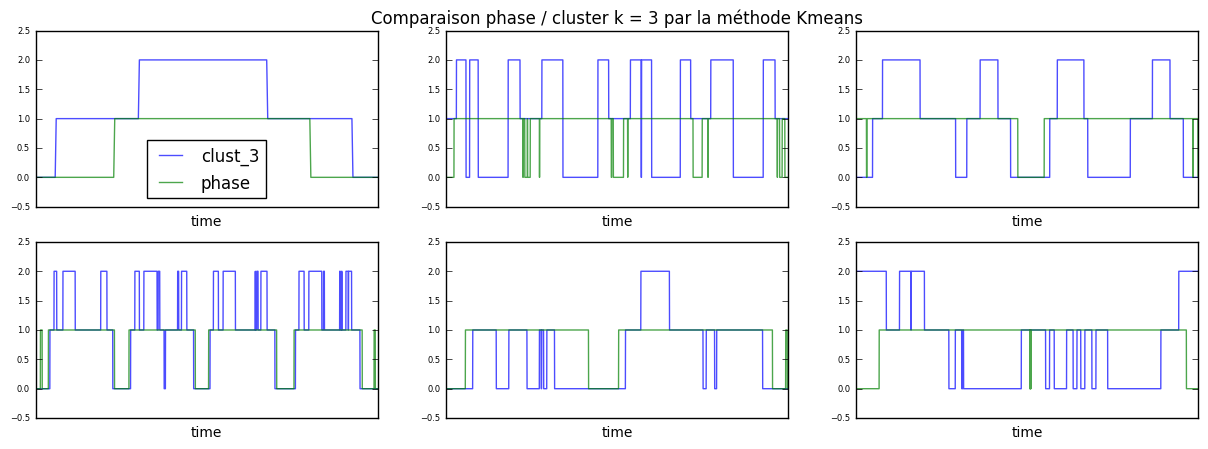

In [54]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
axes[0][1].set_title("Comparaison phase / cluster k = 3 par la méthode Kmeans")
df_clusters.ix['0001-3.csv'].plot(x = 'time', y = ['clust_3', 'phase'], ylim=[-0.5, 2.5], xticks = [], ax = axes[0,0], alpha = 0.7, fontsize = 6)
df_clusters.ix['0119-4.csv'].plot(x = 'time', y = ['clust_3', 'phase'], ylim=[-0.5, 2.5], xticks = [], ax = axes[0,1], alpha = 0.7, fontsize = 6, legend = False)
df_clusters.ix['0133-6.csv'].plot(x = 'time', y = ['clust_3', 'phase'], ylim=[-0.5, 2.5], xticks = [], ax = axes[0,2], alpha = 0.7, fontsize = 6, legend = False)
df_clusters.ix['0250-1.csv'].plot(x = 'time', y = ['clust_3', 'phase'], ylim=[-0.5, 2.5], xticks = [], ax = axes[1,0], alpha = 0.7, fontsize = 6, legend = False)
df_clusters.ix['0386-3.csv'].plot(x = 'time', y = ['clust_3', 'phase'], ylim=[-0.5, 2.5], xticks = [], ax = axes[1,1], alpha = 0.7, fontsize = 6, legend = False)
df_clusters.ix['0406-5.csv'].plot(x = 'time', y = ['clust_3', 'phase'], ylim=[-0.5, 2.5], xticks = [], ax = axes[1,2], alpha = 0.7, fontsize = 6, legend = False)

### Zoom sur un vol : 4 clusters / 2 phases

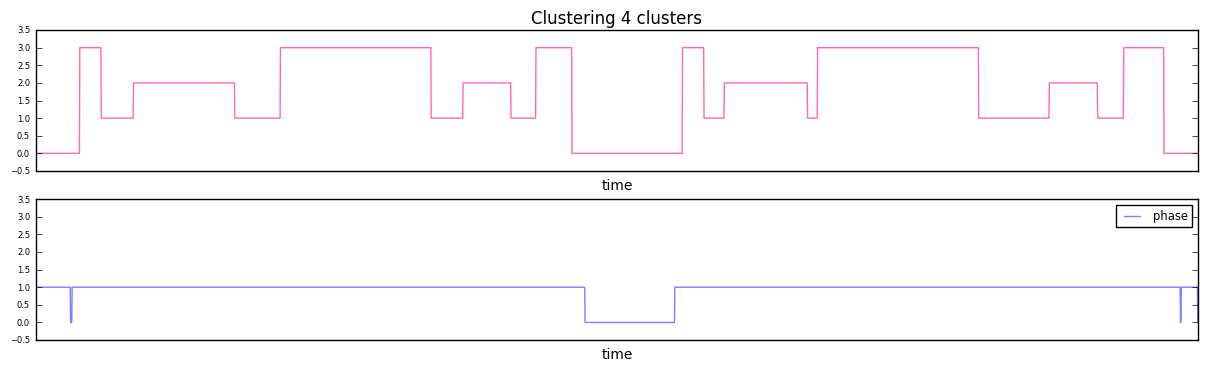

In [75]:
fig, axes = plt.subplots(2,1, figsize=(10,8))
df_clusters.ix['0133-6.csv'].plot(x = 'time', y = ['clust_4'], ylim=[-0.5, 3.5],xticks = [], color = 'hotpink', ax = axes[0], figsize=(15, 4), fontsize = 6, legend = False)
df_clusters.ix['0133-6.csv'].plot(x = 'time', y = ['phase'], ylim=[-0.5, 3.5],xticks = [], ax = axes[1], alpha = 0.5, figsize=(15, 4), fontsize = 6, legend = False)
axes[0].set_title('Clustering 4 clusters')
plt.legend(loc = 'best', fontsize = 'small')

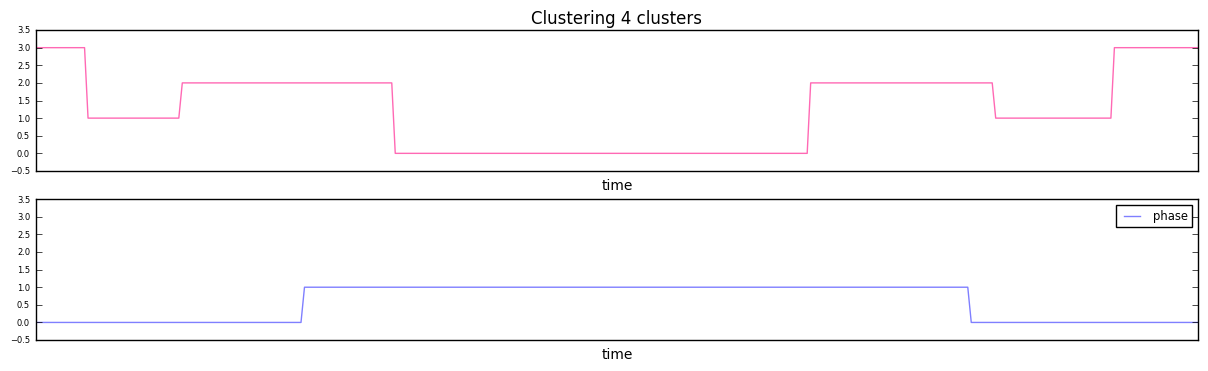

In [77]:
fig, axes = plt.subplots(2,1, figsize=(10,8))
df_clusters.ix['0001-3.csv'].plot(x = 'time', y = ['clust_4'], ylim=[-0.5, 3.5], color = 'hotpink', xticks = [], ax = axes[0], figsize=(15, 4), fontsize = 6, legend = False)
df_clusters.ix['0001-3.csv'].plot(x = 'time', y = ['phase'], ylim=[-0.5, 3.5],xticks = [], ax = axes[1], alpha = 0.5, figsize=(15, 4), fontsize = 6, legend = False)
axes[0].set_title('Clustering 4 clusters')
plt.legend(loc = 'best', fontsize = 'small')